### 사전준비

In [1]:
# 기본 패키지
import numpy as np 
import pandas as pd 
import scipy as sp 

import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 머신러닝 패키지 import
import statsmodels.api as sm 
import sklearn as sk

In [3]:
# 한글 설정, 마이너스 표시 가능하게 하기
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font = 'Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [4]:
# 농어데이터 준비
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

##### 훈련세트 / 테스트세트 분리

In [5]:
from random import random
from turtle import st
from sklearn.model_selection import train_test_split

# 훈련세트 / 테스트세트 분리
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [15]:
# 훈련입력세트 / 테스트입력세트 2차원으로 변경
new_train_input = train_input.reshape(-1,1)


In [16]:
# 테스트 입력세트
new_test_input = test_input.reshape(-1,1)


##### 모델 훈련

In [19]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)

In [20]:
# 훈련세트로 훈련
knr.fit(X=new_train_input, y=train_target)

KNeighborsRegressor(n_neighbors=3)

In [21]:
# 결정계수 확인
knr.score(X=new_train_input, y=test_target)

ValueError: Found input variables with inconsistent numbers of samples: [14, 42]

In [14]:
# 길이가 50cm일때 무게가 얼마일까요?
knr.predict([[50.0]])

array([1033.33333333])

#### 무게가 1500g이 넘는데?

##### 훈련세트에 대한 산점도

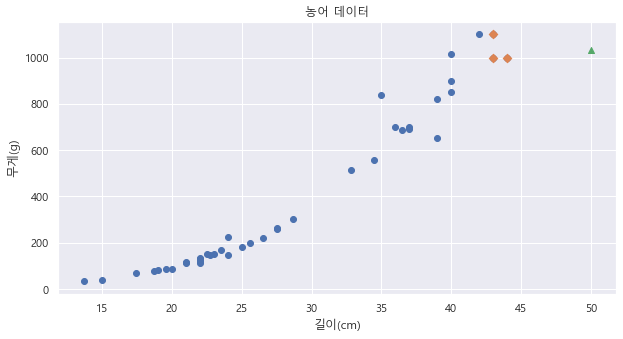

In [25]:
# 길이 50cm 농어에 대한 이웃값 3개
dist, inds = knr.kneighbors([[50.0]])

plt.figure(figsize=(10,5))
plt.scatter(x=new_train_input, y=train_target)
plt.scatter(x=new_train_input[inds], y=train_target[inds],marker='D')
plt.scatter(x=50, y=knr.predict([[50.0]])[0], marker='^')

plt.title('농어 데이터')
plt.xlabel('길이(cm)')
plt.ylabel('무게(g)')
plt.show()

##### 이웃 값(3개) 평균

In [27]:
np.mean(train_target[inds])

1033.3333333333333

##### 예측값은 이웃값 3개의 평균값으로 나옴

In [28]:
# 길이를 100cm해도 결과는 이웃값 3개의 평균으로 나옴
knr.predict(X=[[100]])

array([1033.33333333])

#### 선형회귀 Linear Regression

가장 대표적인 회귀 알고리즘

In [29]:
# KNN X -> LinearRegression 0
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [30]:
# 선형회귀 모델로 훈련
lr.fit(X=new_train_input, y=train_target)

LinearRegression()

In [31]:
# 훈련데이터로 결정계수 확인
lr.score(X=new_train_input, y=train_target)

0.9398463339976041

In [32]:
# 테스트데이터로 결정계수 확인
lr.score(X=new_test_input, y=test_target)

0.824750312331356

In [33]:
# 길이 50cm 예측
lr.predict(X=[[50.0]])
# 1033.3333(KNN) vs 1241.8386(Linear Reg)

array([1241.83860323])

In [34]:
# 1차 방정식의 값을 도출
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


- coef_(상관계수 값) = 가중치(weight)
- intercept_(절편) = 잔차(error)

#### Linear Regression 산점도

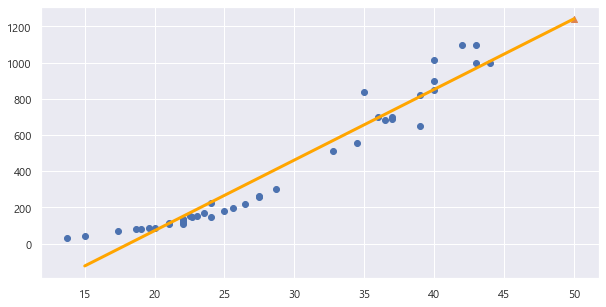

In [43]:
plt.figure(figsize=(10,5))
plt.scatter(x=new_train_input,y=train_target)
plt.scatter(x=50,y=lr.predict([[50]]), marker='^')

# 1차 방정식 산점도
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_], color='orange', linewidth='3')
plt.plot()
plt.show()

#### 다항회귀

In [45]:
train_poly = np.column_stack((new_train_input**2, new_train_input))
train_poly.shape

(42, 2)

In [46]:
test_poly = np.column_stack((new_test_input**2, new_test_input))
test_poly

array([[  70.56,    8.4 ],
       [ 324.  ,   18.  ],
       [ 756.25,   27.5 ],
       [ 453.69,   21.3 ],
       [ 506.25,   22.5 ],
       [1600.  ,   40.  ],
       [ 900.  ,   30.  ],
       [ 605.16,   24.6 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [1892.25,   43.5 ],
       [ 262.44,   16.2 ],
       [ 784.  ,   28.  ],
       [ 745.29,   27.3 ]])

In [47]:
print(train_poly, test_poly)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.     22.  ]
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]] [[  70.56    8.4 ]
 [ 324.     18.  ]
 [ 756.25   27.5 ]
 [ 453.69   21.3 ]
 [ 506.25   22.5 ]
 [1600.     40.  ]
 [ 900.     30.  ]
 [ 605.16   24.6 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [1892.25  

#### 다항 선형회귀

In [48]:
lr = LinearRegression()
lr.fit(X=train_poly, y=train_target)

LinearRegression()

In [49]:
# 훈련데이터로 결정계수 확인
lr.score(X=train_poly, y=train_target)

0.9706807451768623

In [50]:
# 테스트 데이터로 결정계수 확인
lr.score(X=test_poly, y=test_target)

0.9775935108325122

In [53]:
# 길이 50cm 농어의 무게 예측
# 길이의 제곱값, 원래 길이 값 둘 다 넣어서 예측해야함
lr.predict([[50.0**2, 50.0]])
# 농어의 무게 예측 = 1573.98g

array([1573.98423528])

In [54]:
# a*길이*길이 + b 길이 + c
# a = 1.0143
# b = -21.5579
# c = 116.0502
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278264


In [58]:
lr.coef_[0]

1.0143321093767301

#### 다항 회귀 산점도


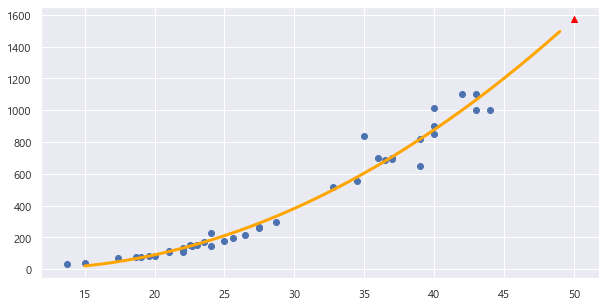

In [59]:
point = np.arange(15,50)

plt.figure(figsize=(10,5))
plt.scatter(x=new_train_input, y=train_target)
# 15~49까지의 2차 방정식 그림
plt.plot(point, lr.coef_[0]*(point**2) + lr.coef_[1]*point + lr.intercept_, color='orange', linewidth='3.0')
plt.scatter(x=[50.0], y=lr.predict([[50.0**2, 50.0]]), marker='^', color='red')
plt.show()
# 아무리 생선의 길이가 작아져도, 0g이 되지 않음